<a href="https://colab.research.google.com/github/puroong/2025-SSUML/blob/main/Term_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
# print(IN_COLAB)

if IN_COLAB:
    !git clone https://github.com/ssuai/ISLP.git
    !git clone https://github.com/puroong/2025-SSUML
    #!pip install ISLP # This takes too much time

fatal: destination path 'ISLP' already exists and is not an empty directory.
fatal: destination path '2025-SSUML' already exists and is not an empty directory.


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [33]:
!pip install colorama

rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

In [34]:
train_data = pd.read_csv('2025-SSUML/data/term_proj2_train.csv')


In [35]:
train_data.head(10)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [36]:
train_data.drop(columns=['CustomerId', 'id']).describe().style.background_gradient()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


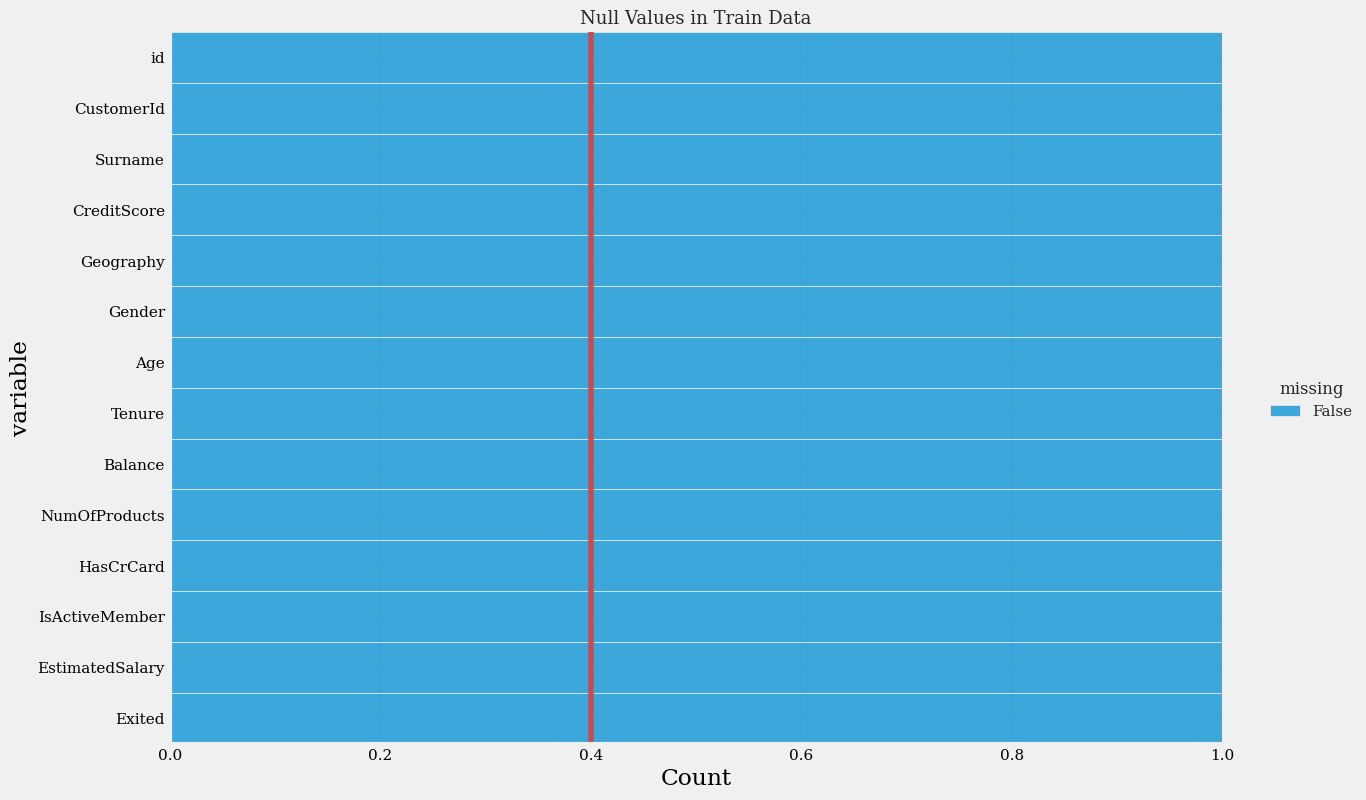

In [37]:
sns.displot(data=train_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

# -------------------------

# sns.displot(data=test_data.isnull().melt(value_name='missing'),
#     y='variable',
#     hue='missing',
#     multiple='fill',
#     height=8,
# #     width=10,
#     aspect=1.6
# )

# # specifying a threshold value
# plt.axvline(0.4, color='r')
# plt.title('Null Values in Test Data', fontsize=13)
# plt.show()

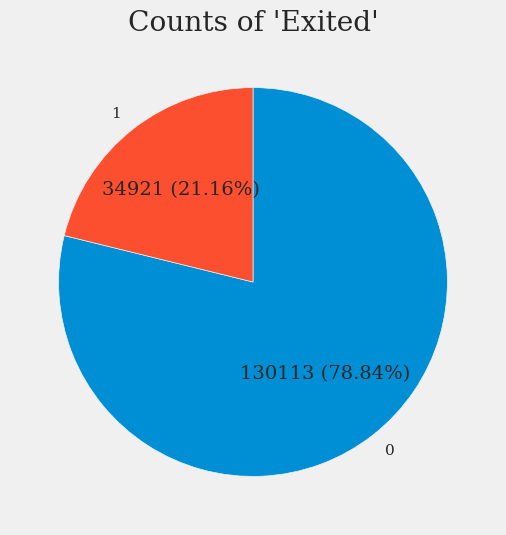

In [38]:
counts = train_data['Exited'].value_counts().sort_index()

# Define a formatting function for autopct
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return f"{absolute} ({pct:.2f}%)"


plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index.tolist(),
    autopct=lambda pct: func(pct, counts),
    #colors=['#66b3ff','#ff9999'],  # Optional: custom colors
    startangle=90,
    counterclock=False
)
plt.title("Counts of 'Exited'")
plt.show()

In [39]:
# Unique value counts for each column
unique_counts = train_data.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

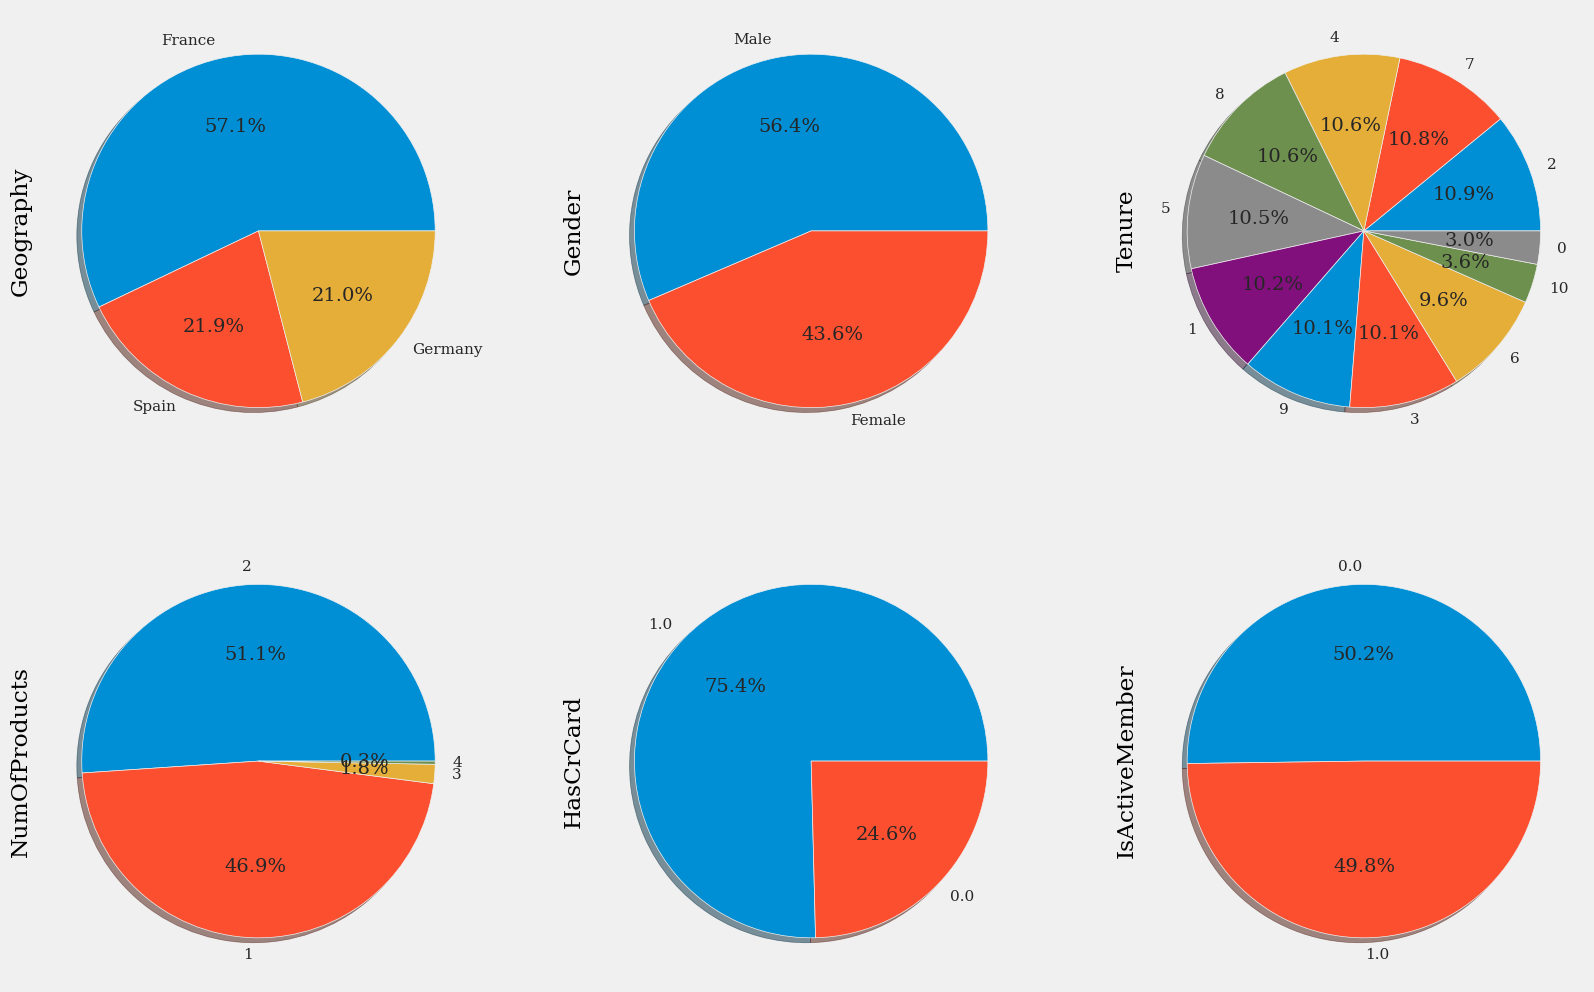

In [40]:
if 'Exited' in categorical_vars:
    categorical_vars.remove('Exited')

plt.figure(figsize=(18,12))
for i, column in enumerate(categorical_vars):
    plt.subplot(2,3,i+1)
    train_data[column].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
    plt.ylabel(f'{column}')

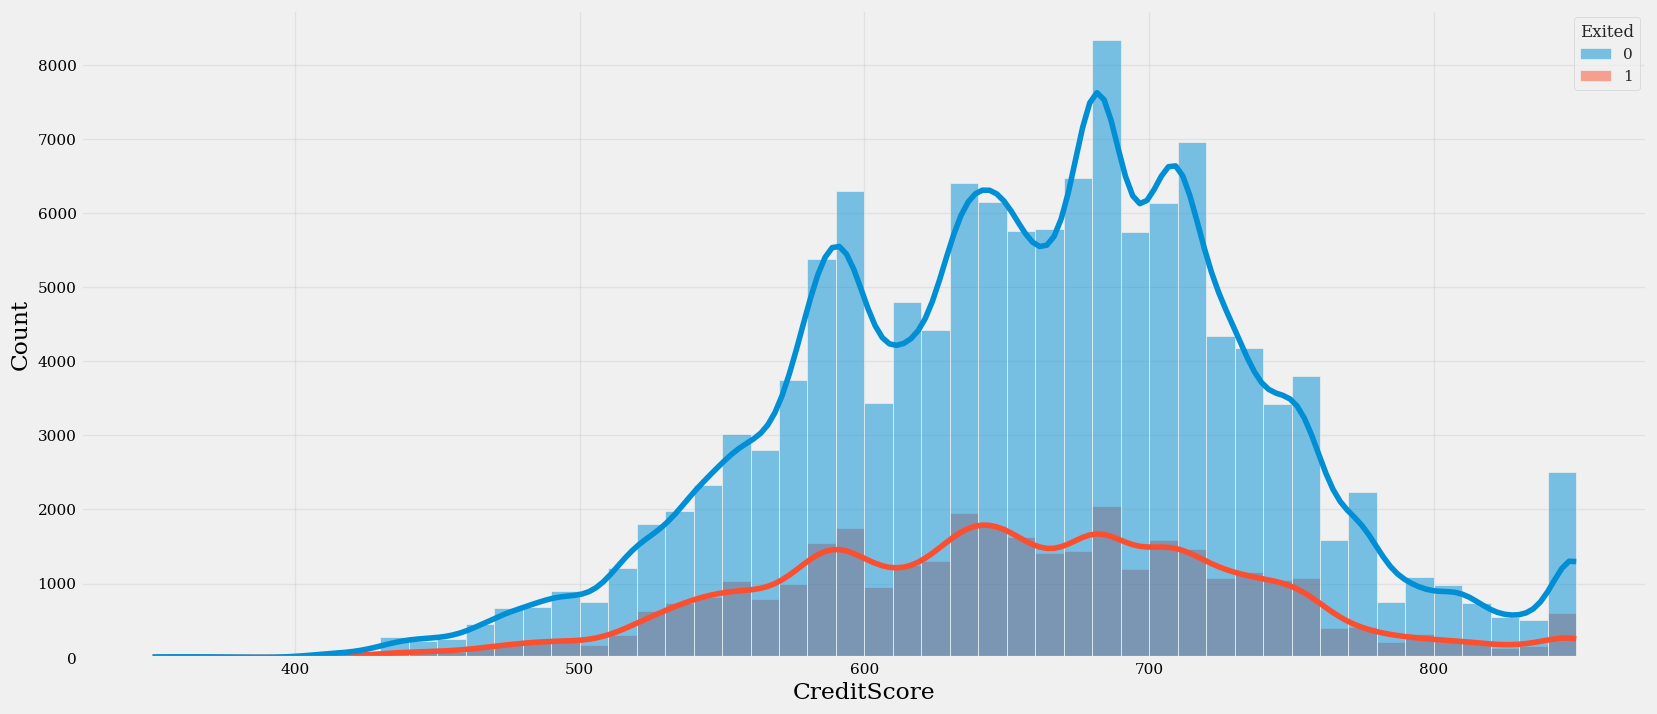

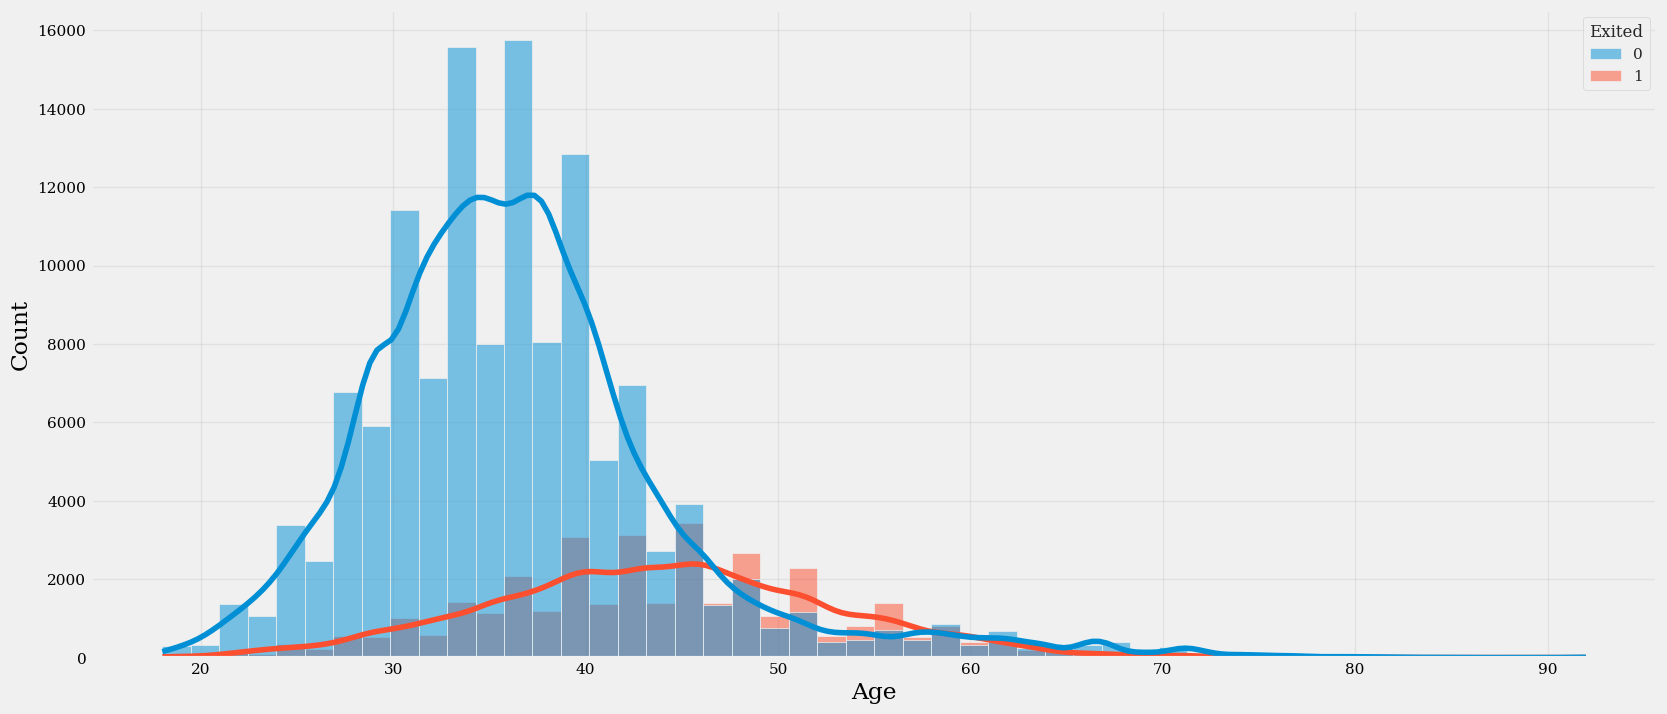

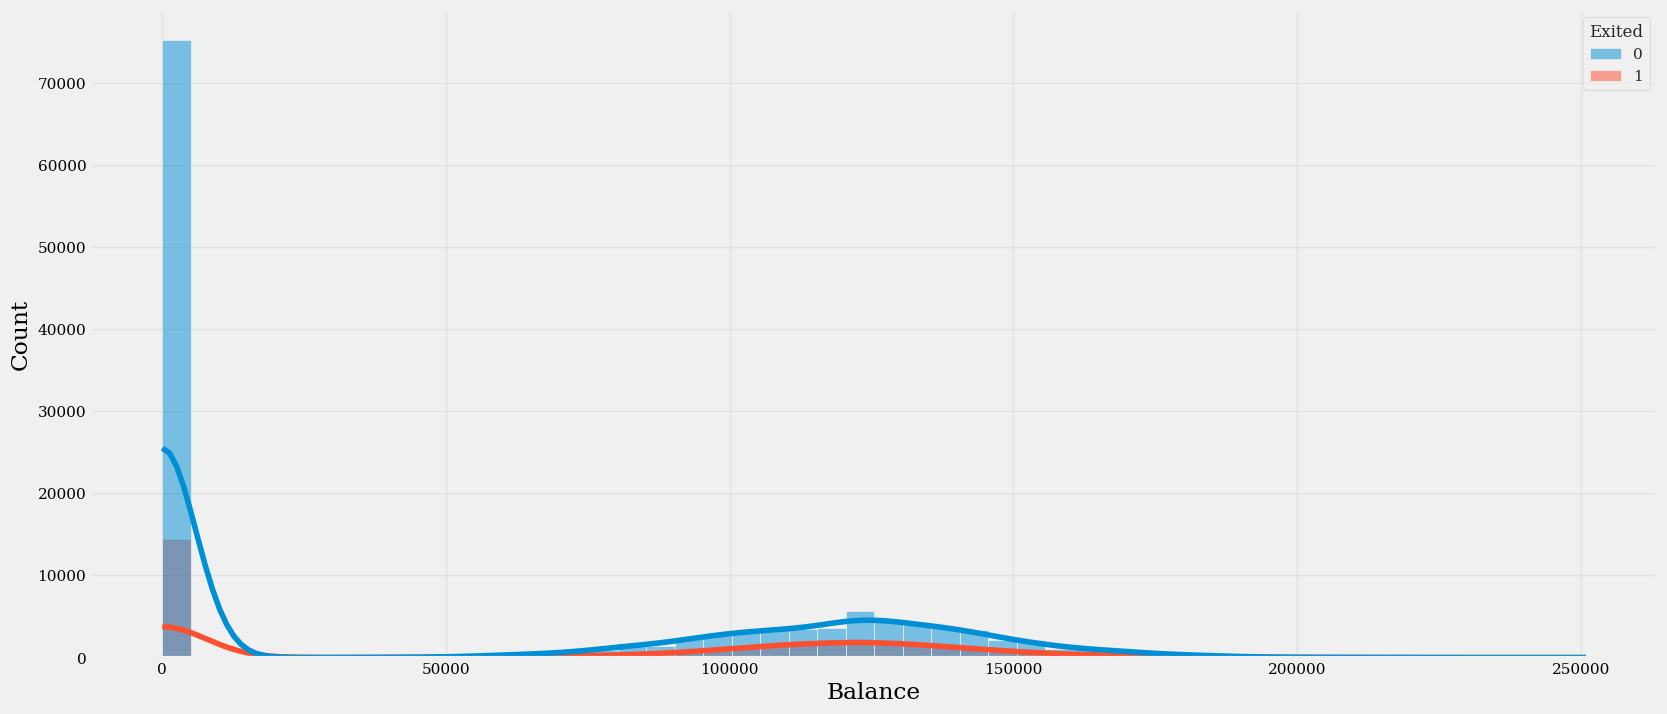

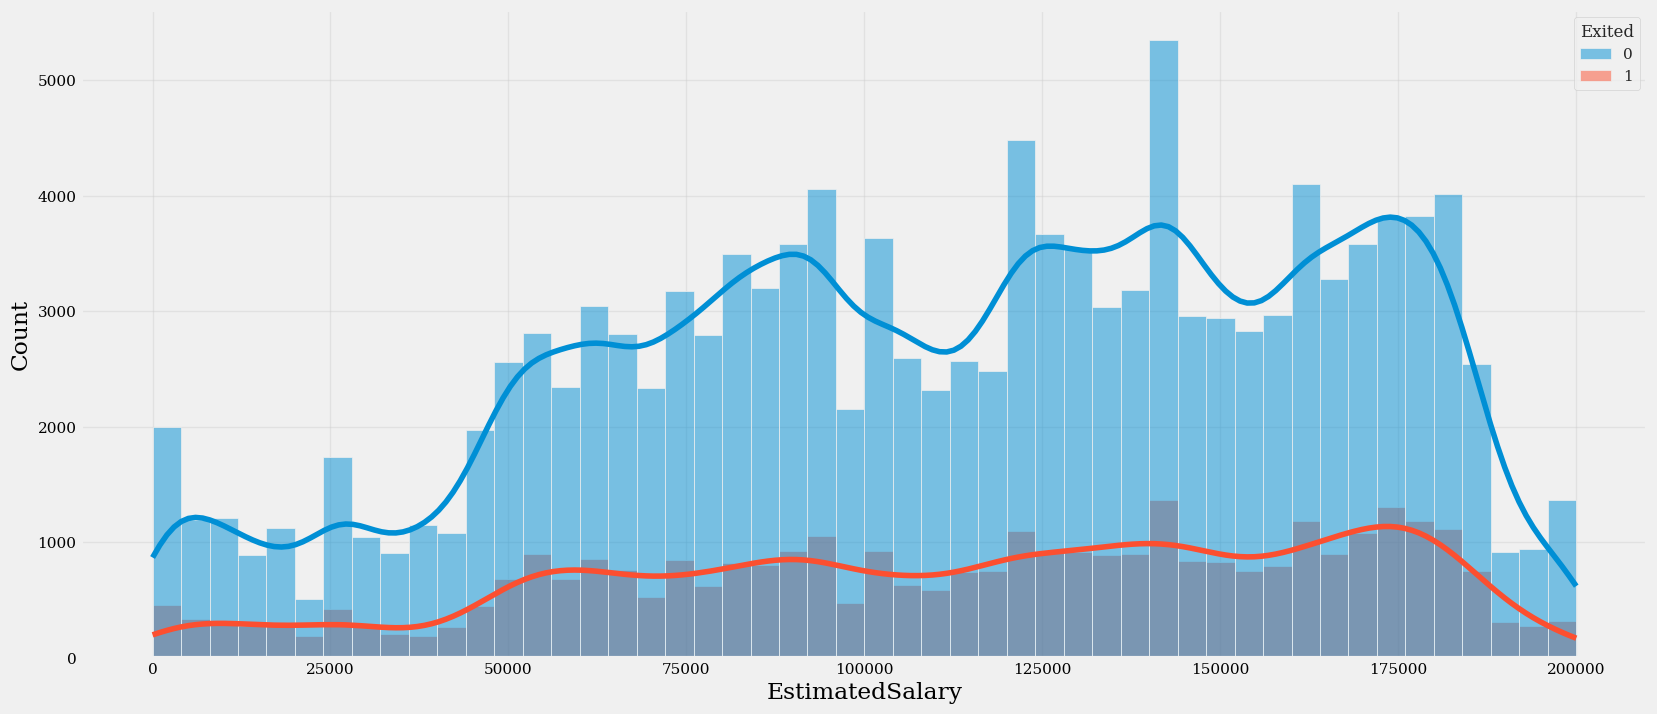

In [41]:
if 'CustomerId' in continuous_vars:
    continuous_vars.remove('CustomerId')
if 'Surname' in continuous_vars:
    continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 8))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

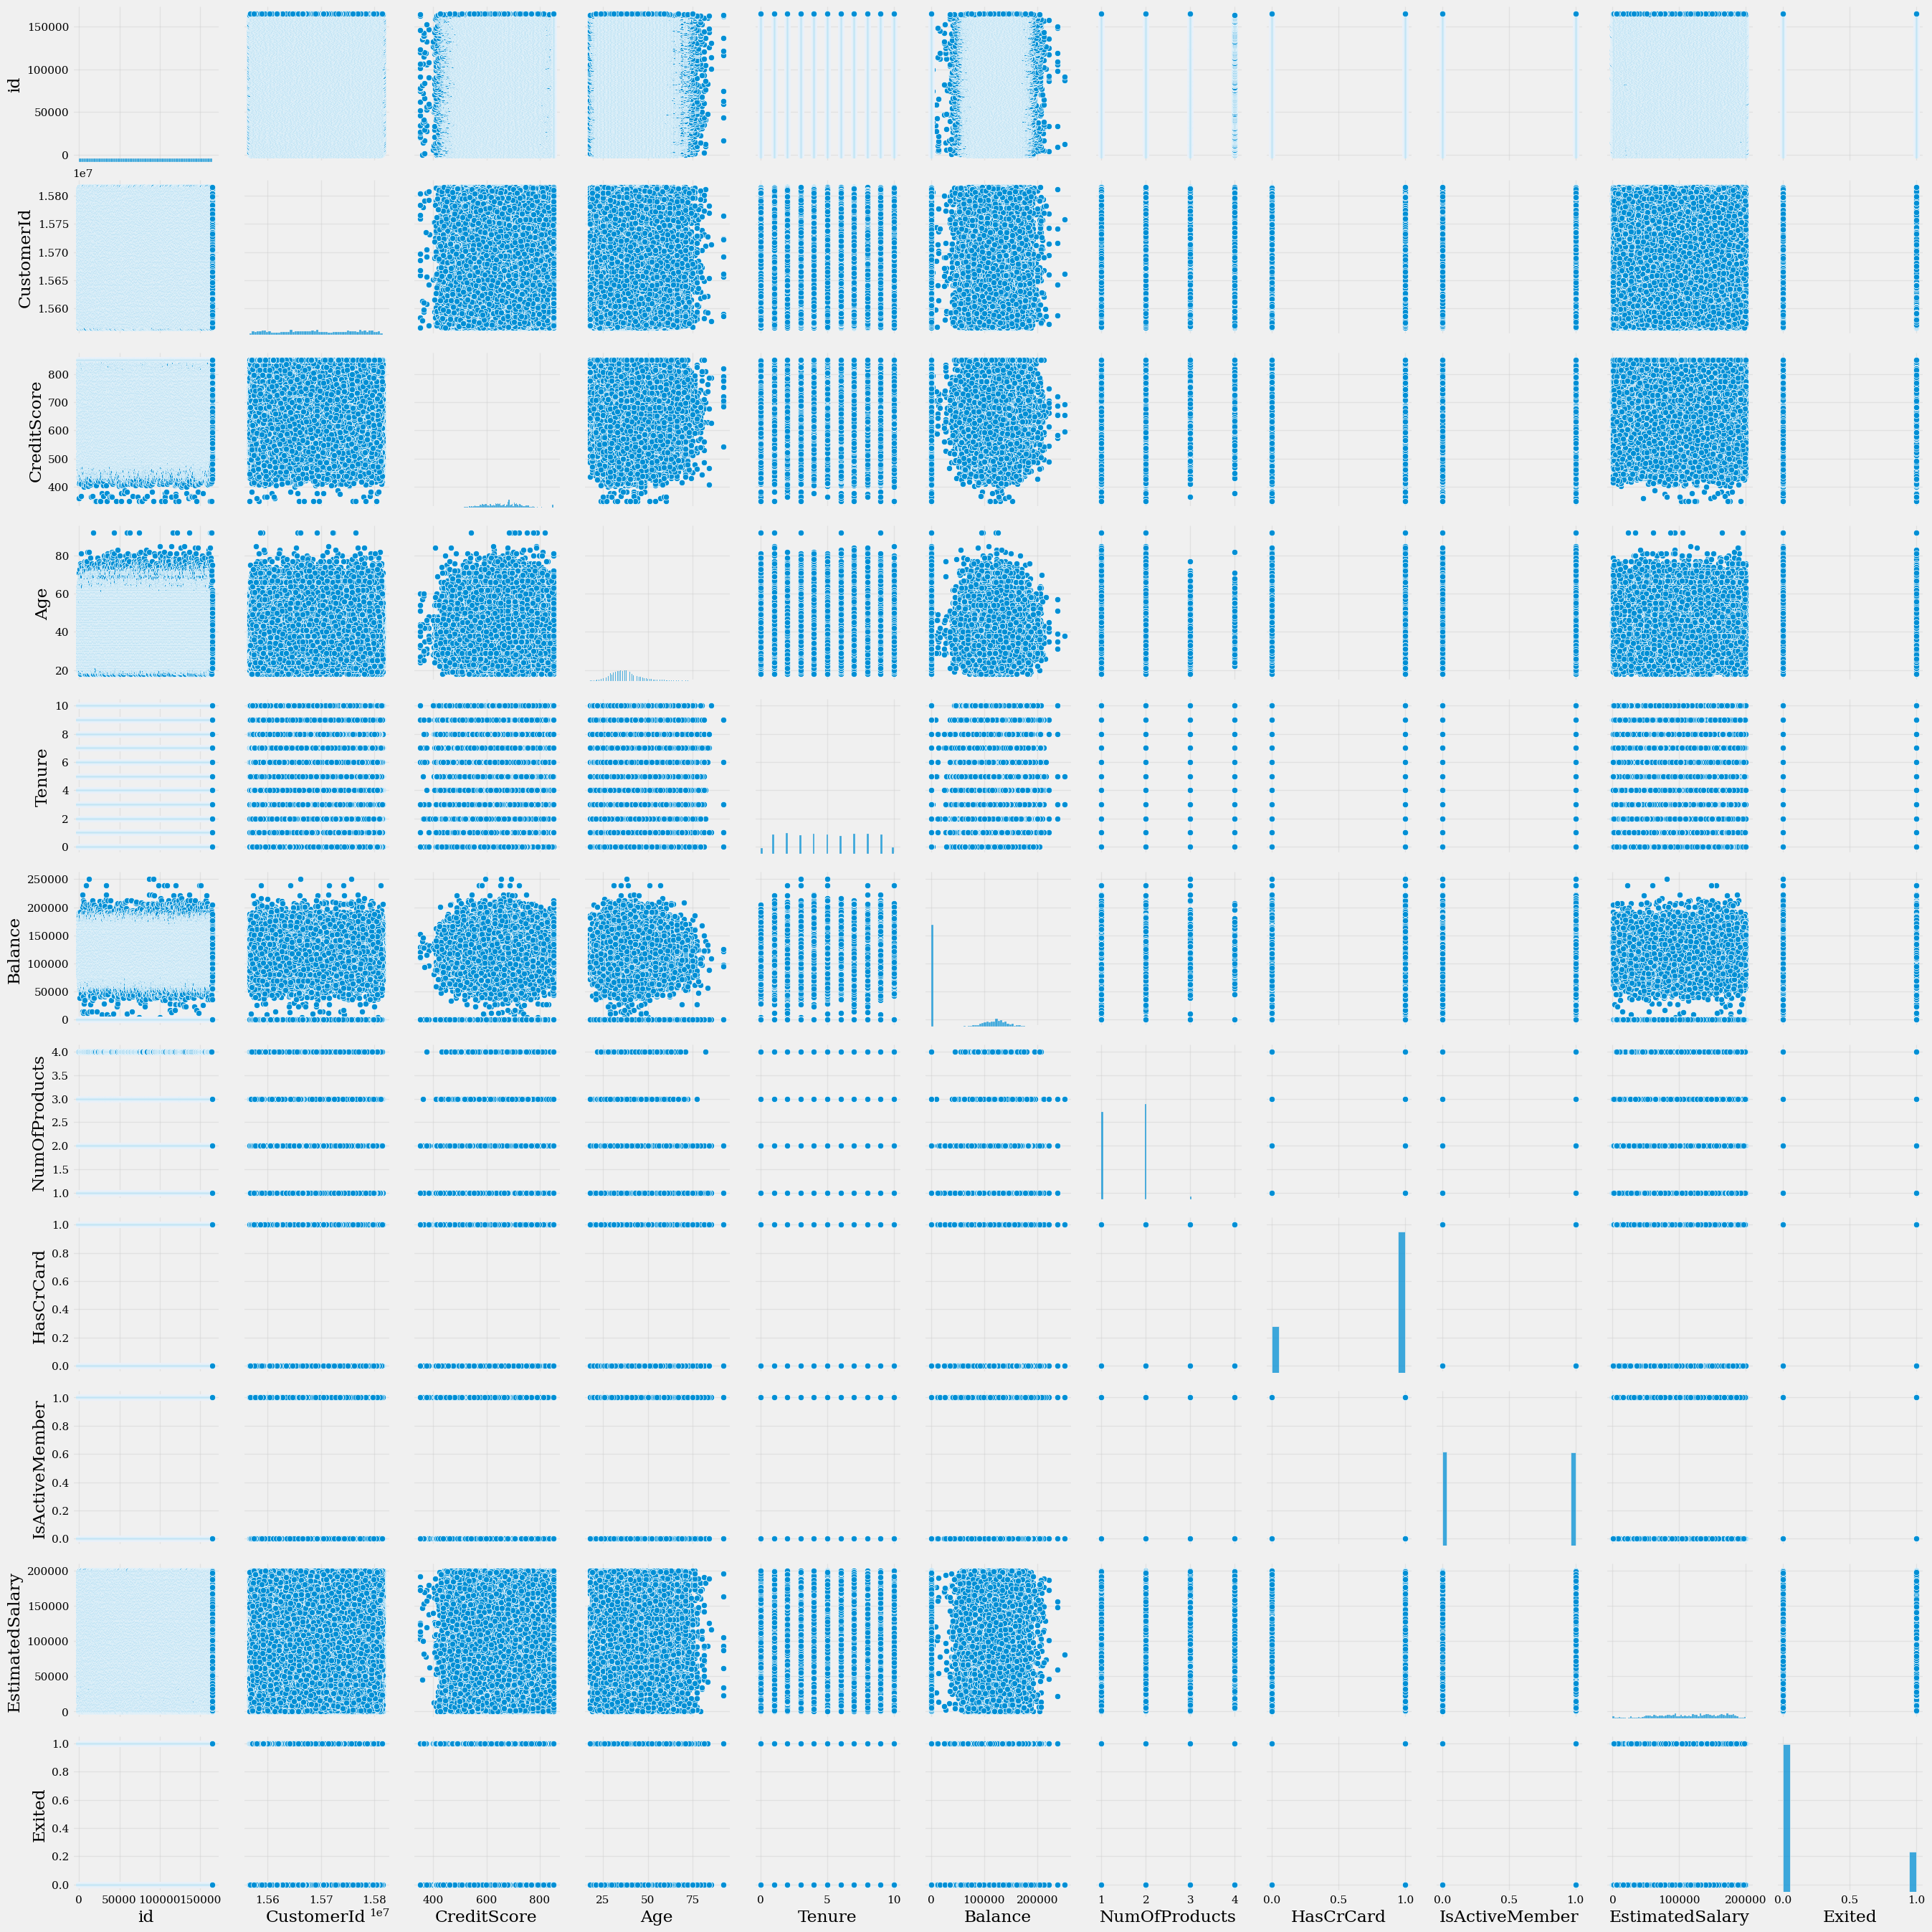

In [42]:
# pairplot for continuous variables
sns.pairplot(train_data)
# df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
# sns.pairplot(df3)
# sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

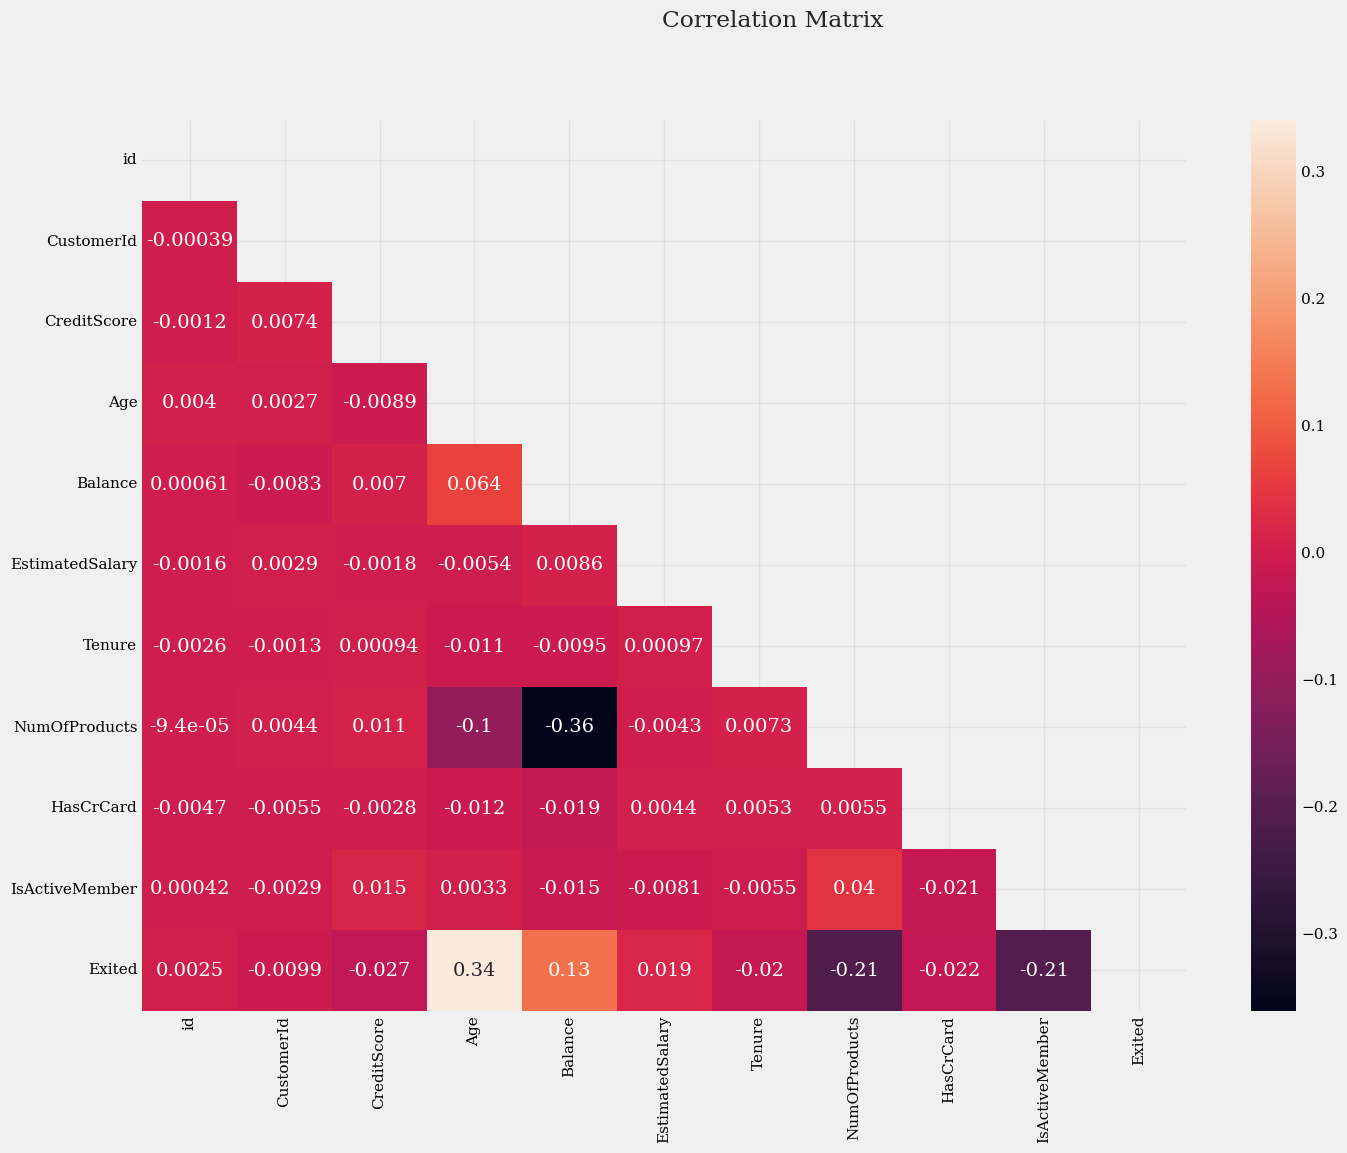

In [43]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [44]:
X = train_data.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train_data['Exited']

In [45]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                         'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,3,0.00,181449.97,True,False,False,False,True,True,False,False,True,False,True,False,False
1,627,33.0,1,0.00,49503.50,True,False,False,False,True,False,True,False,True,False,True,False,False
2,678,40.0,10,0.00,184866.69,True,False,False,False,True,True,False,False,True,False,True,False,False
3,581,34.0,2,148882.54,84560.88,True,False,False,False,True,False,True,False,True,True,False,False,False
4,716,33.0,5,0.00,15068.83,False,False,True,False,True,False,True,False,True,False,True,False,False


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, stratify=y, test_size=0.2)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.73      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, stratify=y, test_size=0.2)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

print(f"{'#'*10}TRAIN DATA{'#'*10}")
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

print(f"{'#'*10}TEST DATA{'#'*10}")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

##########TRAIN DATA##########
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26023
           1       0.73      0.53      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007

##########TEST DATA##########
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     32529
           1       0.96      0.91      0.93      8730

    accuracy                           0.97     41259
   macro avg       0.97      0.95      0.96     41259
weighted avg       0.97      0.97      0.97     41259



In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 15, 'n_estimators': 100}


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, stratify=y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

print(f"{'#'*10}TRAIN DATA{'#'*10}")
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

print(f"{'#'*10}TEST DATA{'#'*10}")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

##########TRAIN DATA##########
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     26023
           1       0.61      0.72      0.66      6984

    accuracy                           0.84     33007
   macro avg       0.76      0.80      0.78     33007
weighted avg       0.85      0.84      0.85     33007

##########TEST DATA##########
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     32529
           1       0.69      0.82      0.75      8730

    accuracy                           0.89     41259
   macro avg       0.82      0.86      0.84     41259
weighted avg       0.90      0.89      0.89     41259

